# Task_image_audio

## Task description

For each variant, students must:
- Synthetically generate the specified grayscale image and audio signal.
- Perform multidimensional signal analysis including Fourier transform, filtering, and visualization.
- Compare time and frequency domain representations.

Important: The image and audio must be generated in Python using NumPy, OpenCV, or other standard libraries.

Variant 6:
- Image: Diagonal stripes pattern.
- Audio: Square wave at 500 Hz (use harmonics).

## Python code

Installation of the necessary Python libraries

In [2]:
! pip install opencv-python
! pip install librosa

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.5 MB 3.3 MB/s eta 0:00:12
   -- ------------------------------------- 2.1/39.5 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.9/39.5 MB 4.2 MB/s eta 0:00:09
   --- ------------------------------------ 3.7/39.5 MB 4.0 MB/s eta 0:00:09
   ---- ----------------------------------- 4.2/39.5 MB 3.9 MB/s eta 0:00:10
   ---- ----------------------------------- 4.7/39.5 MB 3.6 MB/s eta 0:00:10
   ----- ---------------------------------- 5.2/39.5 MB 3.4 MB/s eta 0:00:11
   ----- ---------------------------------- 5.5/39.5 MB 3.3 MB/s eta 0:00:11
   ----- ---------------------------------- 5.8/39.5 MB 3.1 MB/s eta 0:00:12
   ------ --------------------------------- 6.0/39.5 MB 2.9 MB/s eta 0:00:12
   ------ --------------------------------- 6.3/39.5 MB 2.7 MB/s eta 0:00:13
   ------ ---

### Step 1: Generate Synthetic Signals

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import square
from scipy.io.wavfile import write
import librosa
import librosa.display

# --- Image Generation: Diagonal Stripes ---
def generate_diagonal_stripes(size=256, spacing=20):
    img = np.zeros((size, size), dtype=np.uint8)
    for i in range(0, size, spacing):
        cv2.line(img, (i, 0), (0, i), 255, 1)  # Draw diagonal lines
    return img

# --- Audio Generation: Square Wave (500Hz with Harmonics) ---
def generate_square_wave(freq=500, duration=3, fs=44100, harmonics=5):
    t = np.linspace(0, duration, int(fs * duration))
    y = np.zeros_like(t)
    for k in range(1, 2 * harmonics + 1, 2):  # Sum odd harmonics
        y += (4 / (np.pi * k)) * np.sin(2 * np.pi * freq * k * t)
    return t, y, fs

# Generate signals
image = generate_diagonal_stripes()
cv2.imwrite('diagonal_stripes.png', image) # Save image

t, square_audio, fs = generate_square_wave()
write('square_wave.wav', fs, (square_audio * 32767).astype(np.int16))  # Save audio

### Step 2: Image Analysis (2D FFT & Filtering)

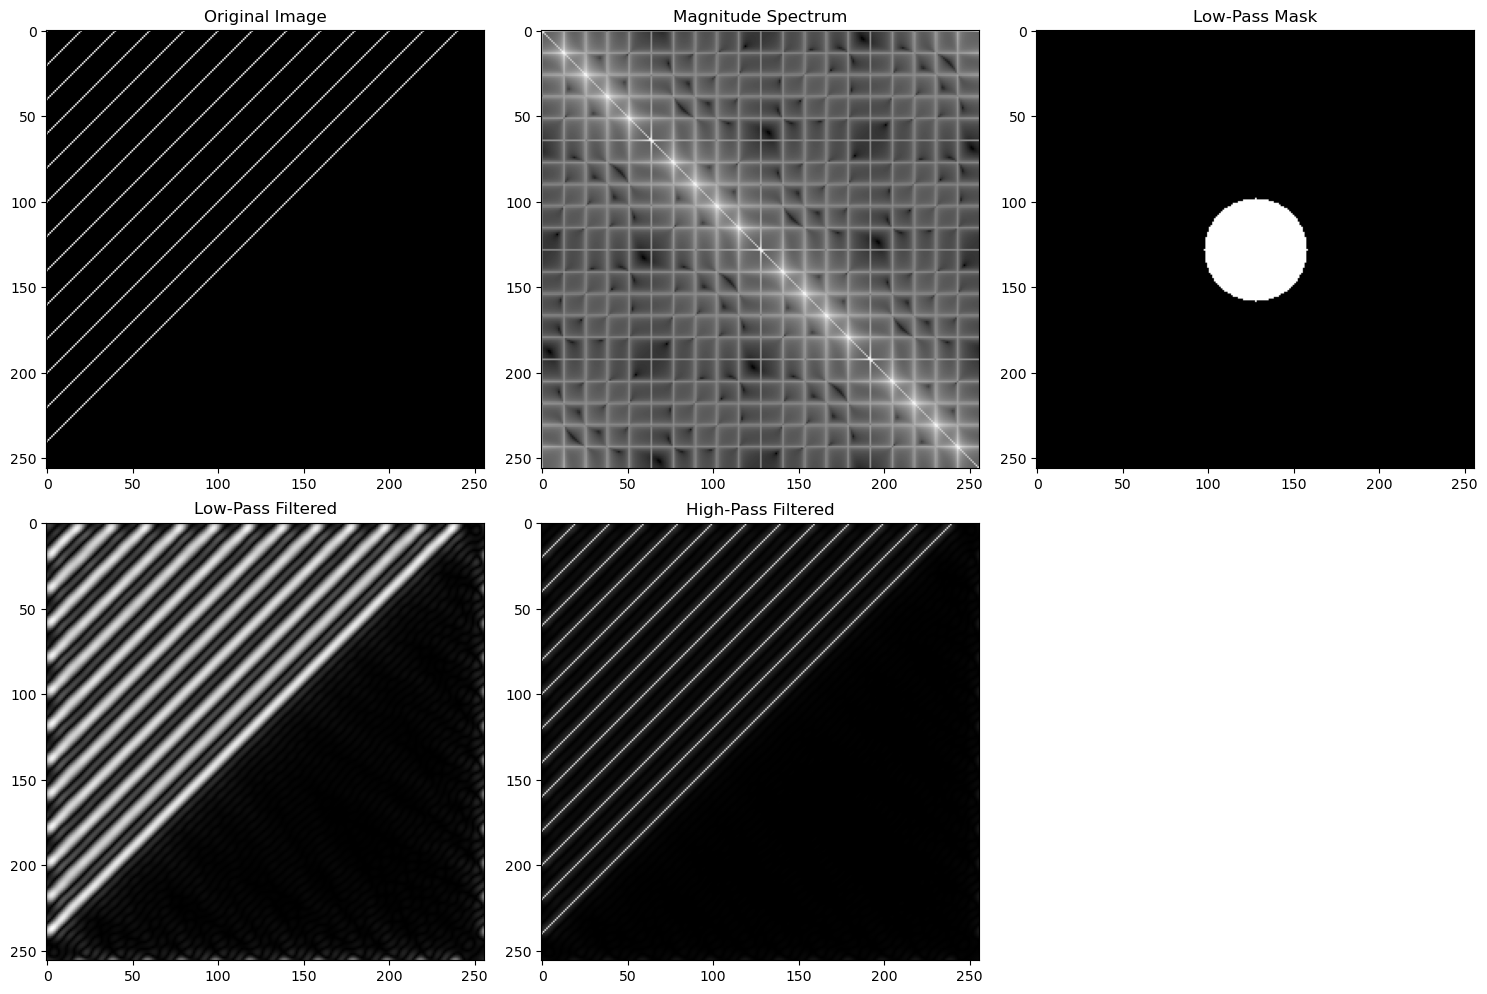

In [5]:
# Compute 2D FFT
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # Center zero-frequency

# Magnitude spectrum (log scale)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

# Low-pass/High-pass filtering
rows, cols = image.shape
crow, ccol = rows//2, cols//2
mask_lp = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lp, (ccol, crow), 30, 1, -1)  # Low-pass mask (radius=30)
mask_hp = 1 - mask_lp  # High-pass mask

# Apply filters
fshift_lp = fshift * mask_lp
fshift_hp = fshift * mask_hp

# Reconstruct images
img_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_lp)))
img_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_hp)))

# Visualization
plt.figure(figsize=(15, 10))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.subplot(233), plt.imshow(mask_lp, cmap='gray'), plt.title('Low-Pass Mask')
plt.subplot(234), plt.imshow(img_lp, cmap='gray'), plt.title('Low-Pass Filtered')
plt.subplot(235), plt.imshow(img_hp, cmap='gray'), plt.title('High-Pass Filtered')
plt.tight_layout()
plt.savefig('image_analysis.png')

### Step 3: Audio Analysis (Time/Frequency Domains)

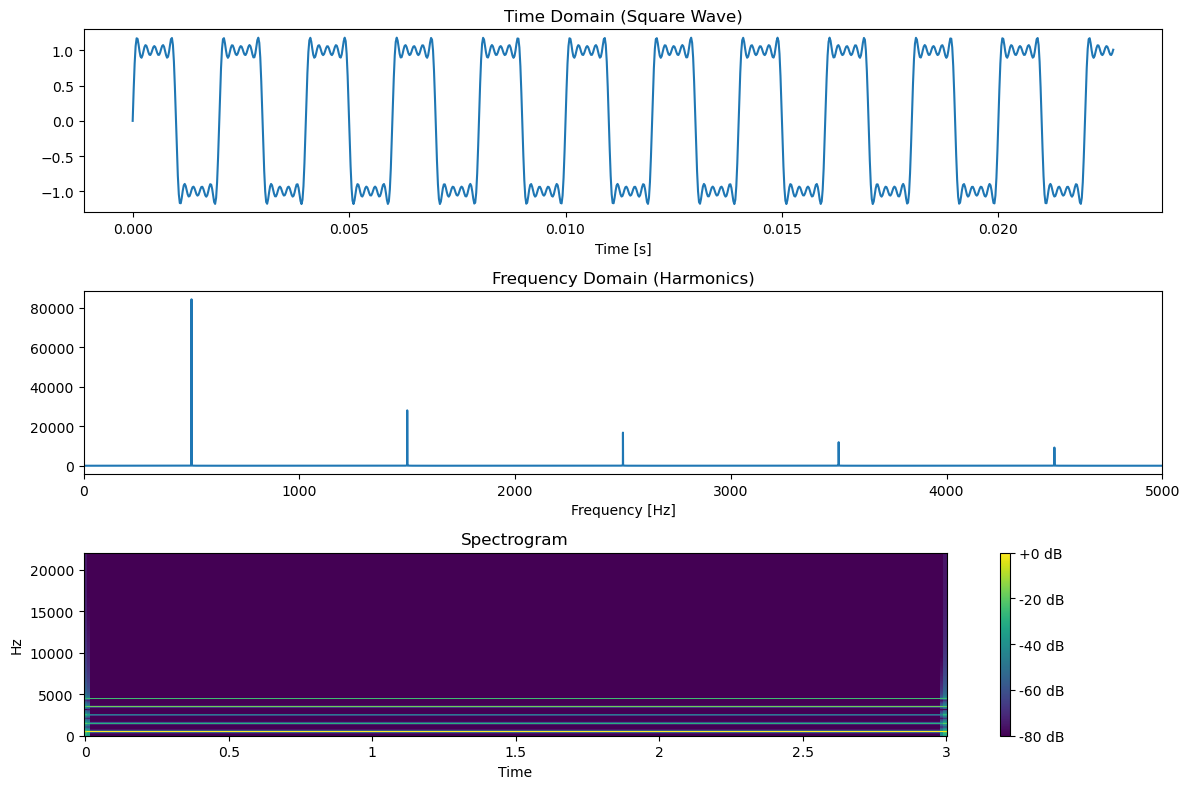

In [6]:
# Time-domain plot
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(t[:1000], square_audio[:1000])  # First 1000 samples
plt.title('Time Domain (Square Wave)')
plt.xlabel('Time [s]')

# Frequency-domain plot
Y = np.fft.fft(square_audio)
freqs = np.fft.fftfreq(len(Y), 1/fs)
plt.subplot(312)
plt.plot(freqs[:len(freqs)//2], np.abs(Y[:len(Y)//2]))
plt.title('Frequency Domain (Harmonics)')
plt.xlabel('Frequency [Hz]')
plt.xlim(0, 5000)  # Show up to 5kHz

# Spectrogram
D = librosa.stft(square_audio.astype(np.float32))
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.subplot(313)
librosa.display.specshow(S_db, sr=fs, x_axis='time', y_axis='hz', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.savefig('audio_analysis.png')